In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [28]:
df_list = pd.read_csv('listings.csv')

In [29]:
df_list.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,360863,https://www.airbnb.com/rooms/360863,20240320024717,2024-03-20,previous scrape,SPECIAL OFFER @ COSY AND CHARMING,Fully furnished and renovated apartment in the...,The Barceloneta is a triangular spit of land t...,https://a0.muscache.com/pictures/4378248/3e40f...,1824328,https://www.airbnb.com/users/show/1824328,Umberto,2012-02-28,"Barcelona, Spain",I am passionate about traveling and discoverin...,NaN,NaN,57%,t,https://a0.muscache.com/im/users/1824328/profi...,https://a0.muscache.com/im/users/1824328/profi...,La Barceloneta,2.0,4.0,"['email', 'phone']",t,f,"Barcelona, Catalonia, Spain",la Barceloneta,Ciutat Vella,41.384280,2.195760,Private room in rental unit,Private room,2,NaN,1 private bath,NaN,NaN,"[""Cleaning available during stay"", ""Baking she...",NaN,31,150,31,31,150,150,31.0,150.0,NaN,NaN,0,0,0,0,2024-03-20,32,0,0,2012-04-13,2015-10-21,4.73,4.84,4.84,4.91,4.94,4.71,4.74,NaN,f,2,1,1,0,0.22
1,17475,https://www.airbnb.com/rooms/17475,20240320024717,2024-03-20,city scrape,Attic Sagrada Familia,Beautiful attic apartment <br />with large ter...,NaN,https://a0.muscache.com/pictures/f6e6718f-dba0...,65623,https://www.airbnb.com/users/show/65623,Luca,2009-12-25,"Rome, Italy",Italian.,within a few hours,100%,82%,f,https://a0.muscache.com/im/pictures/user/989d6...,https://a0.muscache.com/im/pictures/user/989d6...,Dreta de l'Eixample,2.0,6.0,"['email', 'phone']",t,t,NaN,la Dreta de l'Eixample,Eixample,41.399390,2.170440,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Microwave"", ""Outdoor dining area"", ""Private ...",$165.00,3,90,3,3,90,90,3.0,90.0,NaN,t,0,0,0,7,2024-03-20,29,12,1,2010-07-10,2024-03-01,4.48,4.73,4.23,4.82,4.73,4.82,4.50,NaN,f,1,1,0,0,0.17
2,18674,https://www.airbnb.com/rooms/18674,20240320024717,2024-03-20,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia Maria,2010-01-19,"Barcelona, Spain","We are Mireia (47) & Maria (49), two multiling...",within an hour,97%,85%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,la Sagrada Família,44.0,46.0,"['email', 'phone']",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.405560,2.172620,Entire rental unit,Entire home/apt,8,2.0,2 baths,3.0,6.0,"[""Paid parking on premises"", ""Private patio or...",$210.00,1,1125,1,4,1125,1125,2.9,1125.0,NaN,t,18,41,63,252,2024-03-20,40,6,0,2013-05-27,2023-11-07,4.33,4.44,4.62,4.74,4.67,4.77,4.28,HUTB-002062,t,28,28,0,0,0.30
3,97529,https://www.airbnb.c

<Axes: >

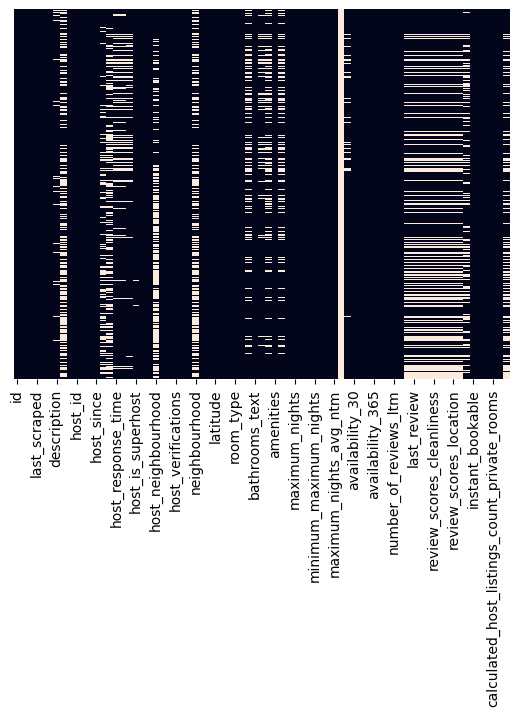

In [30]:
sns.heatmap(df_list.isnull(),yticklabels=False,cbar=False)

In [31]:
df_list = df_list.drop(['calendar_updated', 'id','name','description',
                        'neighborhood_overview','latitude',
                        'longitude','neighbourhood','calendar_updated',
                        'host_id', 'host_name', 'host_since', 'host_location', 
                        'host_about','host_response_time',
                        'host_response_rate', 'host_acceptance_rate', 
                        'host_neighbourhood', 'host_listings_count',
                        'host_has_profile_pic', 'host_identity_verified',
                        'minimum_minimum_nights', 'maximum_nights_avg_ntm',
                        'maximum_minimum_nights', 'minimum_maximum_nights',
                        'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'host_is_superhost',
                        'host_thumbnail_url', 'host_picture_url', 'bathrooms_text', 'host_total_listings_count',
                        'host_total_listings_count', 'host_verifications', 'bathrooms', 'bedrooms', 'beds',
                        'has_availability', 'first_review', 'last_review', 'review_scores_rating',
                        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                        'review_scores_communication', 'review_scores_location', 'review_scores_value',
                        'license', 'reviews_per_month', 'listing_url', 'scrape_id', 'last_scraped', 'picture_url',
                        'host_url', 'source','calendar_last_scraped',], axis=1)

<Axes: >

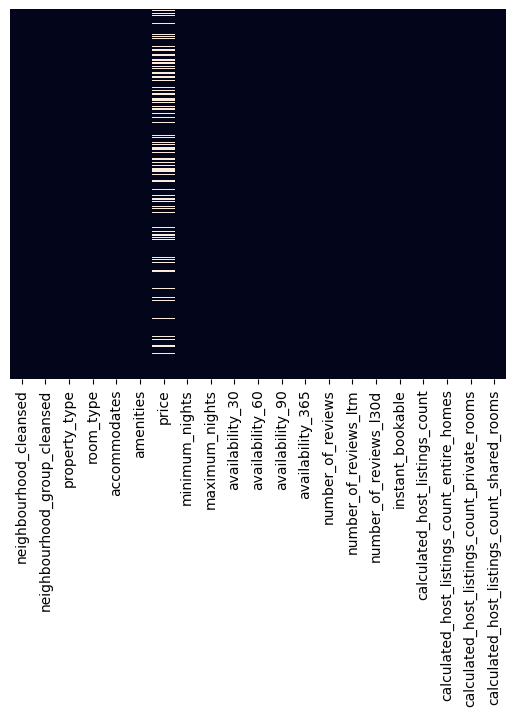

In [32]:
sns.heatmap(df_list.isnull(),yticklabels=False,cbar=False)

In [33]:
df_list['price'] = df_list['price'].replace(r'[\$,]', '', regex=True).astype(float)
df_list['price'] = df_list['price'].fillna(df_list['price'].mean())

<Axes: >

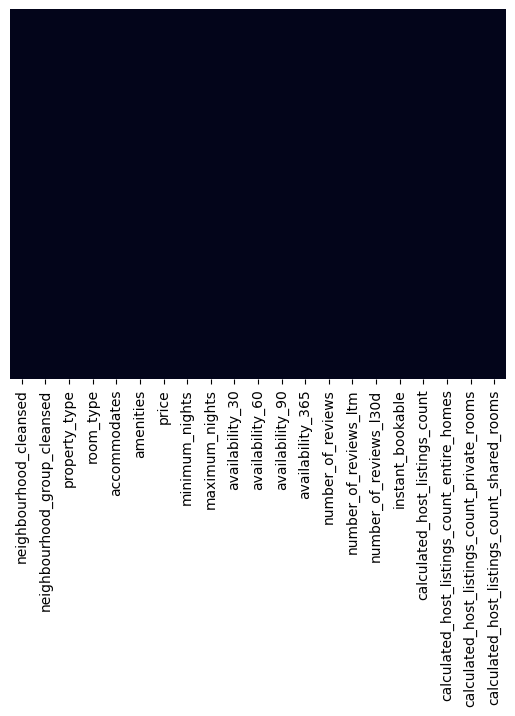

In [34]:
sns.heatmap(df_list.isnull(),yticklabels=False,cbar=False)

In [35]:
df_list.isnull().sum()

neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
property_type                                   0
room_type                                       0
accommodates                                    0
amenities                                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
instant_bookable                                0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0


In [36]:
pd.set_option('display.max_columns', None)
df_list.head()

,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,la Barceloneta,Ciutat Vella,Private room in rental unit,Private room,2,"[""Cleaning available during stay"", ""Baking she...",146.488264,31,150,0,0,0,0,32,0,0,f,2,1,1,0
1,la Dreta de l'Eixample,Eixample,Entire rental unit,Entire home/apt,3,"[""Microwave"", ""Outdoor dining area"", ""Private ...",165.000000,3,90,0,0,0,7,29,12,1,f,1,1,0,0
2,la Sagrada Família,Eixample,Entire rental unit,Entire home/apt,8,"[""Paid parking on premises"", ""Private patio or...",210.000000,1,1125,18,41,63,252,40,6,0,t,28,28,0,0
3,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,2,"[""Microwave"", ""Paid parking off premises"", ""Pr...",146.488264,120,1125,0,0,0,0,67,0,0,f,1,1,0,0
4,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,4,"[""Microwave"", ""Iron"", ""Dedicated workspace"", ""...",94.000000,1,1125,18,45,58,226,54,18,2,f,95,95,0,0


In [37]:
columns = ['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 
           'property_type', 'room_type', 'amenities', 'instant_bookable']

In [38]:
len(columns)

6

In [82]:
# def one_hot_encode_columns(df, columns, max_unique_values=20):
#     """
#     One-hot encode specified columns in a DataFrame using OneHotEncoder from sklearn

#     Parameters:
#     df (pd.DataFrame): DataFrame containing the data.
#     columns (list): list of columns to one-hot encode.
#     max_unique_values (int): Maximum number of unique values to one-hot encode

#     Returns:
#     pd.DataFrame: DataFrame with one-hot encoded columns
#     """
#     encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
    
#     for column in columns:
#         unique_values = df[column].nunique()
        
#         if unique_values <= max_unique_values:
#             # Fit and transform the specified column
#             encoded_array = encoder.fit_transform(df[[column]])
            
#             # Create a DataFrame with the encoded columns
#             encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([column]))
            
#             # Drop the original column and concatenate the encoded columns
#             df = df.drop(column, axis=1)
#             df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
#         else:
#             print(f"Skipping column '{column}' with {unique_values} unique values (greater than {max_unique_values}).")
    
#     return df

In [83]:
def one_hot_encode_columns(df, columns, max_unique_values=20):
    """
    One-hot encode specified columns in a DataFrame using OneHotEncoder from sklearn

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    columns (list): list of columns to one-hot encode.
    max_unique_values (int): Maximum number of unique values to one-hot encode

    Returns:
    pd.DataFrame: DataFrame with one-hot encoded columns
    
    """
    encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

    for column in columns:
        unique_values = df[column].nunique()
        
        if unique_values > max_unique_values:
            # Limit the column to the top max_unique_values categories
            top_values = df[column].value_counts().nlargest(max_unique_values).index
            df[column] = np.where(df[column].isin(top_values), df[column], 'Other')
        
        # Fit and transform the specified column
        encoded_array = encoder.fit_transform(df[[column]])
        
        # Create a DataFrame with the encoded columns
        encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([column]))
        
        # Drop the original column and concatenate the encoded columns
        df = df.drop(column, axis=1)
        df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
    
    return df

In [58]:
df_list.shape

(18519, 21)

In [59]:
df_encoded = one_hot_encode_columns(df_list, columns, max_unique_values=20)

In [60]:
df_encoded.shape

(18519, 88)

In [61]:
X = df_encoded.drop("price", axis=1) # drop labels for training set
y = df_encoded["price"].copy()

In [81]:
# Applying the train / test split 
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [72]:
# Applying the train / test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [73]:
# Confirming the rows and columns are the same for train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14815, 87)
(3704, 87)
(14815,)
(3704,)


In [74]:
lr_model_LR = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.34648576977873

In [75]:
lr_model_RF = RandomForestRegressor()
lr_model_RF.fit(X_train, y_train)
lr_model_RF.score(X_test, y_test)

0.41980318117486437